In [1]:
import numpy as np
import pandas as pd

import json

import plotly.express as px
import plotly.graph_objs as go
import plotly.io as pio
from torch.nn import CrossEntropyLoss

from utils.torchutils import get_device

pio.templates.default = "simple_white"
pio.renderers.default = "png"

from experiments.datasets.imbalancing import split_with_label_distribution_skew
from experiments.datasets.cifar import CIFAR10

from models.cifar import CNN
from experiments.datasets.base import create_dataloader

from torch.optim import SGD

# Hyperparameters

In [2]:
BASEDIR = "../output"

N_CLIENTS = 200
ALPHA_SKEW = 1
BATCH_SIZE = 32
LR = 2e-3
EPOCHS = 5
ROUNDS = 50
ALPHA_FED = 0.9
MODEL = CNN

# Data

In [3]:
dataset = CIFAR10("../data").train_data()
client_dataloaders = [create_dataloader(ds, BATCH_SIZE) for ds in
                      split_with_label_distribution_skew(dataset, ALPHA_SKEW, N_CLIENTS)]

Files already downloaded and verified


In [4]:
def create_optimizer(params, lr):
    return SGD(params, lr)

In [5]:
from pathlib import Path
from utils.metrics_logging import Logger, JsonAdapter


def create_logger(algorithm):
    logger = Logger(algorithm=algorithm, dataset="CIFAR10", model="CNN", rounds=ROUNDS, epochs=EPOCHS)
    logger_adapter = JsonAdapter(Path("../output"), logger.run_id)
    logger.attach(logger_adapter)
    logger.log_run_data()
    return logger

# FedAvg

In [6]:
from federated_learning.fedavg import FedAvg

logger = create_logger("FedAvg")

ID_FEDAVG = logger.run_id

fedavg = FedAvg(
        client_dataloaders,
        model_fn=lambda: MODEL(),
        optimizer_fn=lambda p: create_optimizer(p, LR),
        loss_fn=CrossEntropyLoss(),
        rounds=ROUNDS,
        epochs=EPOCHS,
        alpha=ALPHA_FED,
        logger=logger,
        device=get_device(),
        test_data=client_dataloaders
    )

fedavg.fit()

Using device 'cuda'


Round:   0%|          | 0/50 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

In [7]:
del fedavg

# FedProx

In [8]:
from federated_learning.fedprox import FedProx

logger = create_logger("FedProx")

ID_FEDPROX = logger.run_id

MU = 1

fedprox = FedProx(
        client_dataloaders,
        model_fn=lambda: MODEL(),
        optimizer_fn=lambda p: create_optimizer(p, LR),
        loss_fn=CrossEntropyLoss(),
        rounds=ROUNDS,
        epochs=EPOCHS,
        alpha=ALPHA_FED,
        logger=logger,
        device=get_device(),
        test_data=client_dataloaders
    )

fedprox.fit()

Using device 'cuda'


Round:   0%|          | 0/50 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

Clients:   0%|          | 0/180 [00:00<?, ?it/s]

In [9]:
del fedprox

# IFCA

In [21]:
from federated_learning.ifca import IFCA

logger = create_logger("IFCA")

ID_IFCA = logger.run_id

N_CLUSTERS = 3

ifca = IFCA(
        client_dataloaders,
        model_fn=lambda: MODEL(),
        optimizer_fn=lambda p: create_optimizer(p, LR),
        loss_fn=CrossEntropyLoss(),
        rounds=ROUNDS,
        epochs=EPOCHS,
        alpha=ALPHA_FED,
        k = N_CLUSTERS,
        logger=logger,
        device=get_device(),
        test_data=client_dataloaders
    )

ifca.fit()

Using device 'cuda'


  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

  0%|          | 0/180 [00:00<?, ?it/s]

In [22]:
del ifca

# FLSC

In [ ]:
from federated_learning.flsc import FLSC

logger = create_logger("FLSC")

ID_FLSC = logger.run_id

N_CLUSTERS = 5
N_CLUSTERS_ASSIGNED = 3

flsc = FLSC(
        client_dataloaders,
        model_fn=lambda: MODEL(),
        optimizer_fn=lambda p: create_optimizer(p, LR),
        loss_fn=CrossEntropyLoss(),
        rounds=ROUNDS,
        epochs=EPOCHS,
        alpha=ALPHA_FED,
        k = N_CLUSTERS,
        n = N_CLUSTERS_ASSIGNED,
        logger=logger,
        device=get_device(),
        test_data=client_dataloaders
    )

flsc.fit()

In [ ]:
del flsc

# Evaluation

In [23]:
def expand_json_column(df: pd.DataFrame, column: str) -> pd.DataFrame:
    return pd.concat((df, pd.json_normalize(df[column])), axis=1).drop(columns=column)

def load_run(run_id: str):
    metadata_file =  Path(BASEDIR).joinpath(run_id + "_meta.json")
    metrics_file =  Path(BASEDIR).joinpath(run_id + "_metrics.json")
    
    with open(metadata_file) as f:
        metadata = json.load(f)
    
    run_metrics = pd.read_json(metrics_file, lines=True)

    run_metrics = expand_json_column(run_metrics, "metrics")
    run_metrics["client_id"] = run_metrics["client_id"].astype(pd.Int64Dtype())
    run_metrics["epoch"] = run_metrics["epoch"].astype(pd.Int64Dtype())
    run_metrics = run_metrics.melt(id_vars=["timestamp", "log_type", "stage", "client_id", "round", "epoch"], value_vars=["loss", "accuracy"], var_name="metric_name", value_name="metric_value")
    
    return run_metrics


def split_metrics(run_metrics):
    client_metrics = run_metrics.query("log_type == 'client'").copy()
    client_metrics["step"] = client_metrics["round"] * 100
    client_metrics["step"] += client_metrics["epoch"]
    server_metrics = run_metrics.query("log_type == 'server'")
    
    server_losses = server_metrics.query("metric_name == 'loss'")
    server_accuracies = server_metrics.query("metric_name == 'accuracy'")
    
    client_losses = client_metrics.query("metric_name == 'loss'")
    client_accuracies = client_metrics.query("metric_name == 'accuracy'")
    
    return server_losses, client_losses, server_accuracies, client_accuracies

In [24]:
ID_FEDAVG = "6b438fea-3d69-4909-8d56-9574871db2ff"
ID_FEDPROX = "4bf96d9a-3770-47ae-9eae-a29711a834e4"
# ID_IFCA = "c07cc75e-779e-4cc8-a55a-c91b7e35b11d"
# ID_FLSC = 

In [25]:
fedavg_metrics = load_run(ID_FEDAVG)
fedavg_metrics["algorithm"] = "FedAvg"

fedprox_metrics = load_run(ID_FEDPROX)
fedprox_metrics["algorithm"] = "FedProx"

ifca_metrics = load_run(ID_IFCA)
ifca_metrics["algorithm"] = "IFCA"

# flsc_metrics = load_run(ID_FLSC)
# flsc_metrics["algorithm"] = "FLSC"

In [26]:
combined_metrics = pd.concat((fedavg_metrics, fedprox_metrics, ifca_metrics))

In [27]:
server_losses, client_losses, server_accuracies, client_accuracies = split_metrics(combined_metrics)

In [28]:
server_accuracies["algorithm"].unique()

array(['FedAvg', 'FedProx', 'IFCA'], dtype=object)

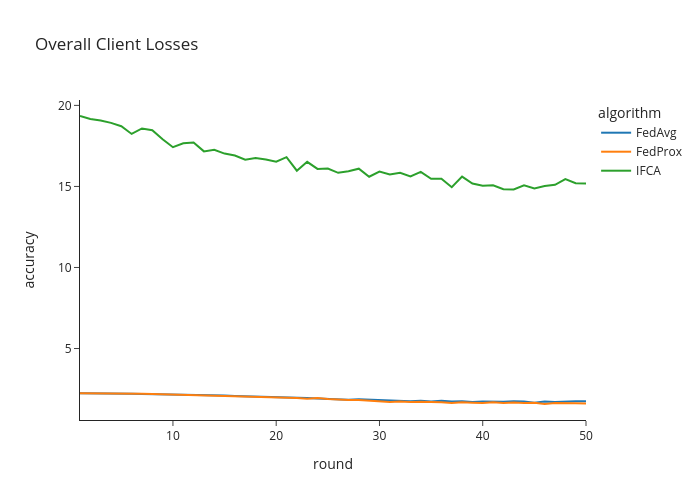

In [29]:
fig = px.line(server_losses, x="round", y="metric_value", color="algorithm", labels={"metric_value": "accuracy"},\
              title=f"""Overall Client Losses""")
fig

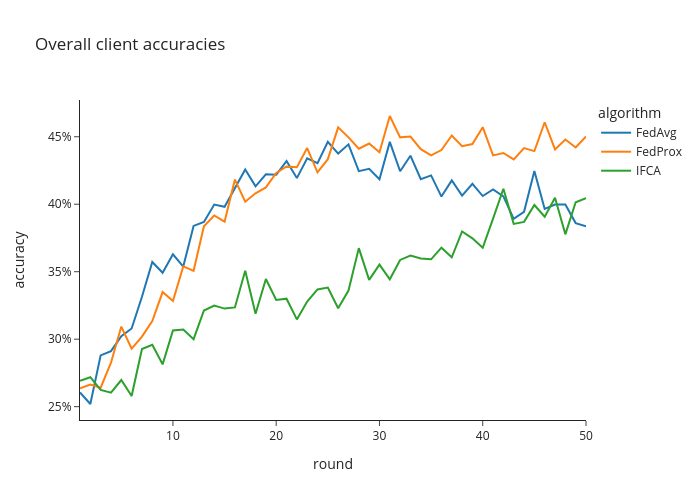

In [30]:
fig = px.line(server_accuracies, x="round", y="metric_value", color="algorithm", labels={"metric_value": "accuracy"},\
              title=f"""Overall client accuracies""")
fig.update_layout(yaxis_tickformat = ".0%")
fig